# Temperature Forecast Project using ML

Problem Statement:
    
    This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

# Importing the dataset

In [1]:
import pandas as pd
df=pd.read_csv('Temperature Forecast.csv',parse_dates=['Date'])

In [2]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

# Importing the required libraries

In [3]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from heatmap import heatmap,corrplot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')
import time

# Getting a basic outlook over the dataset

In [4]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [5]:
df.tail()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
7747,23.0,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,2017-08-30,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,0.059869,0.000000,0.000796,0.000000,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaT,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3
7751,NaN,NaT,37.6,29.9,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.974710,23.701544,21.621661,15.841235,16.655469,37.6450,127.135,212.3350,5.178230,5992.895996,38.9,29.8


In [6]:
df.shape

(7752, 25)

In [7]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   station           7750 non-null   float64       
 1   Date              7750 non-null   datetime64[ns]
 2   Present_Tmax      7682 non-null   float64       
 3   Present_Tmin      7682 non-null   float64       
 4   LDAPS_RHmin       7677 non-null   float64       
 5   LDAPS_RHmax       7677 non-null   float64       
 6   LDAPS_Tmax_lapse  7677 non-null   float64       
 7   LDAPS_Tmin_lapse  7677 non-null   float64       
 8   LDAPS_WS          7677 non-null   float64       
 9   LDAPS_LH          7677 non-null   float64       
 10  LDAPS_CC1         7677 non-null   float64       
 11  LDAPS_CC2         7677 non-null   float64       
 12  LDAPS_CC3         7677 non-null   float64       
 13  LDAPS_CC4         7677 non-null   float64       
 14  LDAPS_PPT1        7677 n

Observations:
    
    1.All column are of type float, except date,
    2.There are null values.

# EDA

# Univariate Analysis

**Column 1: station**

Introduction:
    
    1.Used weather station number: 1 to 25

In [9]:
df1=df.copy()

In [10]:
df1['station'].value_counts()

25.0    310
12.0    310
2.0     310
3.0     310
4.0     310
5.0     310
6.0     310
7.0     310
8.0     310
9.0     310
10.0    310
11.0    310
13.0    310
23.0    310
14.0    310
15.0    310
16.0    310
18.0    310
20.0    310
22.0    310
24.0    310
17.0    310
19.0    310
21.0    310
1.0     310
Name: station, dtype: int64

Observations:
    
    Every station has equal number of observations.

In [11]:
df1['station'].fillna(method='bfill',inplace=True)

In [12]:
df1['station'].isnull().sum()

2

In [13]:
df1.tail()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
7747,23.0,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,2017-08-30,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,0.059869,0.000000,0.000796,0.000000,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaT,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3
7751,NaN,NaT,37.6,29.9,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.974710,23.701544,21.621661,15.841235,16.655469,37.6450,127.135,212.3350,5.178230,5992.895996,38.9,29.8


In [14]:
df1=df1[0:7750]

In [15]:
df1['station'].isnull().sum()

0

In [16]:
df1.shape

(7750, 25)

**Column 2: Date**

Introduction:
    
    Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')

In [17]:
df1['year']=pd.DatetimeIndex(df1['Date']).year

In [18]:
df1['month']=pd.DatetimeIndex(df1['Date']).month
df1['day']=pd.DatetimeIndex(df1['Date']).day

In [19]:
df1.drop('Date',axis=1,inplace=True)

**Column 3:Present_Tmax**

In [20]:
df1['Present_Tmax'].describe()

count    7680.000000
mean       29.768464
std         2.966947
min        20.000000
25%        27.800000
50%        29.900000
75%        32.000000
max        37.600000
Name: Present_Tmax, dtype: float64

<AxesSubplot:xlabel='Present_Tmax', ylabel='Density'>

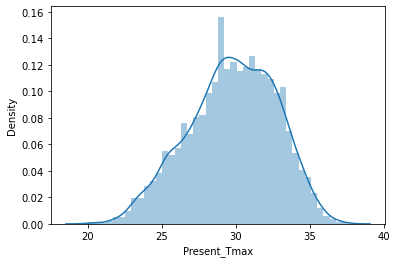

In [21]:
sns.distplot(df1['Present_Tmax'])

Observations:
    
    1.We can see that the data is slightly left skewed.

<AxesSubplot:xlabel='Present_Tmax'>

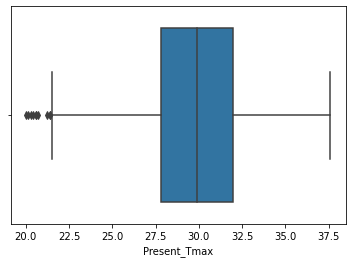

In [22]:
sns.boxplot(df1['Present_Tmax'])

Observations:
    
    1.There are few outliers.

In [23]:
df1['Present_Tmax'].isnull().sum()

70

In [24]:
df1['Present_Tmax'].fillna(method='bfill',inplace=True)

In [25]:
df1['Present_Tmax'].isnull().sum()

0

**Column 4:Present_Tmin**

<AxesSubplot:xlabel='Present_Tmin', ylabel='Density'>

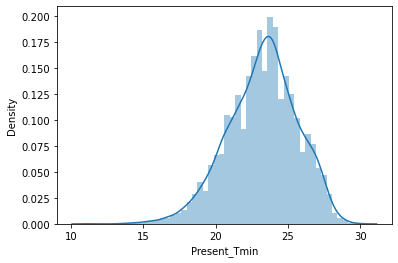

In [26]:
sns.distplot(df1['Present_Tmin'])

Observations:
    
    1.The data is slightly left skewed and between the range 15 to 30.

<AxesSubplot:xlabel='Present_Tmin'>

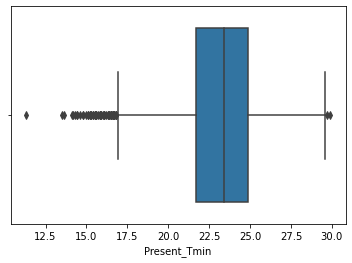

In [27]:
sns.boxplot(df1['Present_Tmin'])

Observations:
    
    1.There are few outliers.

In [28]:
df1['Present_Tmin'].isnull().sum()

70

In [29]:
df1['Present_Tmin'].fillna(method='bfill',inplace=True)

In [30]:
df1['Present_Tmin'].isnull().sum()

0

**Column 5:LDAPS_RHmin**

Introduction:
    
    LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5

<AxesSubplot:xlabel='LDAPS_RHmin', ylabel='Density'>

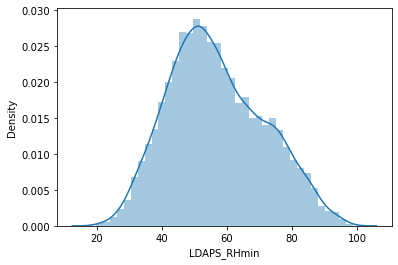

In [31]:
sns.distplot(df1['LDAPS_RHmin'])

Observations:
    
    1.We can see that data is almost  uniformy distributed.

<AxesSubplot:xlabel='LDAPS_RHmin'>

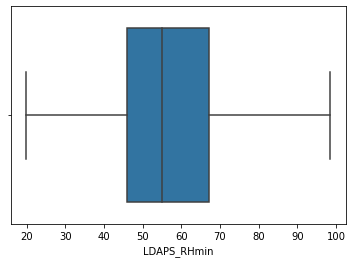

In [32]:
sns.boxplot(df1['LDAPS_RHmin'])

Observations:
    
    1.There are significantly less outliers.

In [33]:
df1['LDAPS_RHmin'].isnull().sum()

75

In [34]:
df1['LDAPS_RHmin'].fillna(method='bfill',inplace=True)

In [35]:
df1['LDAPS_RHmin'].isnull().sum()

0

**Column 6:LDAPS_RHmax**

Introduction:
    
    LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100

<AxesSubplot:xlabel='LDAPS_RHmax', ylabel='Density'>

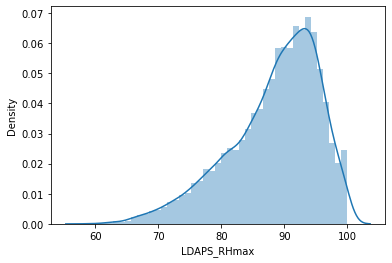

In [36]:
sns.distplot(df1['LDAPS_RHmax'])

Observations:
    
    1.The data slightly left skewed.

<AxesSubplot:xlabel='LDAPS_RHmax'>

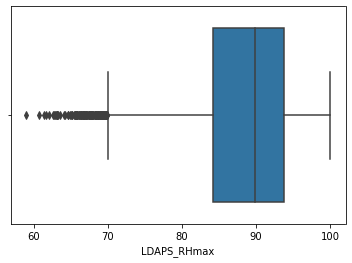

In [37]:
sns.boxplot(df1['LDAPS_RHmax'])

Observations:
    
    1.We can see that there are few outliers.

In [38]:
df1['LDAPS_RHmax'].isnull().sum()

75

In [39]:
df1['LDAPS_RHmax'].fillna(method='bfill',inplace=True)

In [40]:
df1['LDAPS_RHmax'].isnull().sum()

0

**Column 7:LDAPS_Tmax_lapse**

Introduction:
    
     LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5

In [41]:
df1['LDAPS_Tmax_lapse'].describe()

count    7675.000000
mean       29.613845
std         2.942632
min        17.624954
25%        27.673670
50%        29.703426
75%        31.709230
max        38.542255
Name: LDAPS_Tmax_lapse, dtype: float64

<AxesSubplot:xlabel='LDAPS_Tmax_lapse', ylabel='Density'>

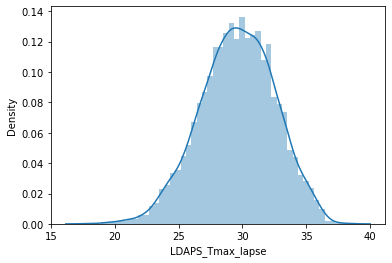

In [42]:
sns.distplot(df1['LDAPS_Tmax_lapse'])

Observations:
    
    1.The data almost looks like uniform distribution.

<AxesSubplot:xlabel='LDAPS_Tmax_lapse'>

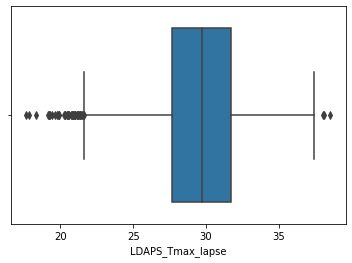

In [43]:
sns.boxplot(df1['LDAPS_Tmax_lapse'])

Observations:
    
    1.There are few outliers.

In [44]:
df1['LDAPS_Tmax_lapse'].isnull().sum()

75

In [45]:
df1['LDAPS_Tmax_lapse'].fillna(df1['LDAPS_Tmax_lapse'].median(),inplace=True)

In [46]:
df1['LDAPS_Tmax_lapse'].isnull().sum()

0

**Column 8:LDAPS_Tmin_lapse**

Introduction:
    
     LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6

<AxesSubplot:xlabel='LDAPS_Tmin_lapse', ylabel='Density'>

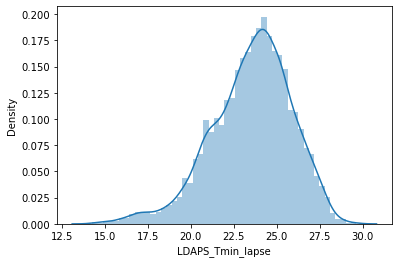

In [47]:
sns.distplot(df1['LDAPS_Tmin_lapse'])

Observations:
    
    1.The data is almost in uniform distribution

<AxesSubplot:xlabel='LDAPS_Tmin_lapse'>

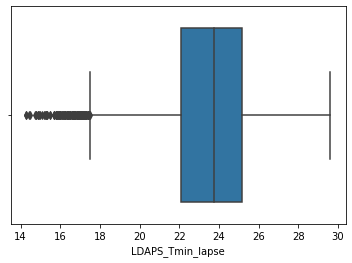

In [48]:
sns.boxplot(df1['LDAPS_Tmin_lapse'])

Observations:
    
    1.There are outliers.

In [49]:
df1[(df1['LDAPS_Tmin_lapse'].isnull()==True)]

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,year,month,day
1025,1.0,27.1,24.5,51.607300,95.346848,29.703426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.6046,126.991,212.3350,2.7850,5304.412598,31.4,22.3,2013,10,8
1026,2.0,29.7,25.4,51.607300,95.346848,29.703426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.6046,127.032,44.7624,0.5141,5162.595703,34.3,23.2,2013,10,8
1027,3.0,29.1,25.9,51.607300,95.346848,29.703426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.5776,127.058,33.3068,0.2661,5157.235352,33.9,24.0,2013,10,8
1028,4.0,30.8,27.3,51.607300,95.346848,29.703426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.6450,127.022,45.7160,2.5348,5148.043945,34.9,24.5,2013,10,8
1029,5.0,29.7,25.7,51.607300,95.346848,29.703426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.5507,127.135,35.0380,0.5055,5147.667969,32.9,23.3,2013,10,8
1030,6.0,29.6,26.4,51.607300,95.346848,29.703426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.5102,127.042,54.6384,0.1457,5161.604004,34.8,24.2,2013,10,8
1031,7.0,29.5,26.8,51.607300,95.346848,29.703426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.5776,126.838,12.3700,0.0985,5140.230957,34.7,25.2,2013,10,8
1032,8.0,29.4,25.6,51.607300,95.346848,29.703426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.4697,126.910,52.5180,1.5629,5145.487793,34.1,25.1,2013,10,8
1033,9.0,28.6,25.5,51.607300,95.346848,29.703426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.4967,126.826,50.9312,0.4125,5170.145020,33.9,23.6,2013,10,8
1034,10.0,29.0,24.2,51.607300,95.346848,29.703426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.4562,126.955,208.5070,5.1782,5117.305176,33.5,22.8,2013,10,8


In [50]:
df1['LDAPS_Tmin_lapse'].fillna(df1['LDAPS_Tmin_lapse'].median(),inplace=True)

In [51]:
df1['LDAPS_Tmin_lapse'].isnull().sum()

0

**Column 9:LDAPS_WS**

Introduction:
    
    LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9

<AxesSubplot:xlabel='LDAPS_WS', ylabel='Density'>

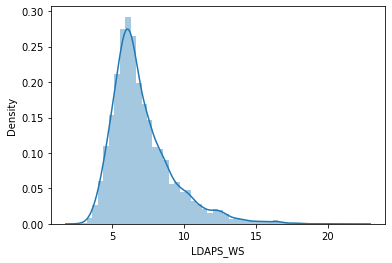

In [52]:
sns.distplot(df1['LDAPS_WS'])

Observations:
    
    1.We can see that the graph is slightly right skewed.

<AxesSubplot:xlabel='LDAPS_WS'>

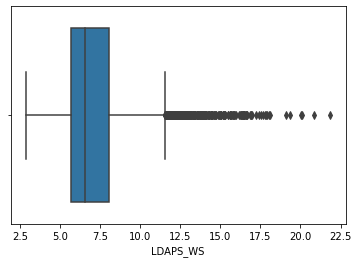

In [53]:
sns.boxplot(df1['LDAPS_WS'])

Observations:
    
    1.There are outliers.

In [54]:
df1['LDAPS_WS'].isnull().sum()

75

In [55]:
df1['LDAPS_WS'].fillna(df1['LDAPS_WS'].median(),inplace=True)

In [56]:
df1['LDAPS_WS'].isnull().sum()

0

**Column 10:LDAPS_LH**

Introduction:
    
     LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4

<AxesSubplot:xlabel='LDAPS_LH', ylabel='Density'>

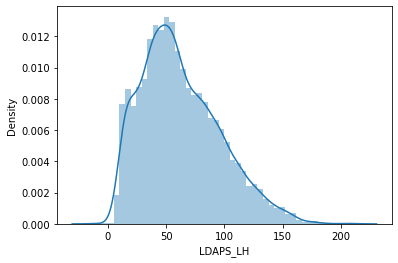

In [57]:
sns.distplot(df1['LDAPS_LH'])

Observations:
    
    1.The graph is slightly right skewed.

<AxesSubplot:xlabel='LDAPS_LH'>

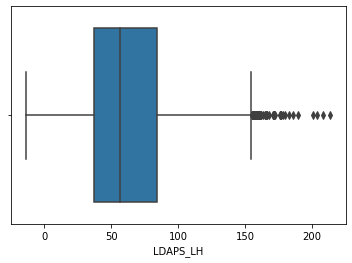

In [58]:
sns.boxplot(df1['LDAPS_LH'])

Observations:
    
    1.There are outliers.

In [59]:
df1['LDAPS_LH'].isnull().sum()

75

In [60]:
df1['LDAPS_LH'].fillna(df1['LDAPS_LH'].median(),inplace=True)

In [61]:
df1['LDAPS_LH'].isnull().sum()

0

**Column 11:LDAPS_CC1**

Introduction:
    
    LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97

<AxesSubplot:xlabel='LDAPS_CC1', ylabel='Density'>

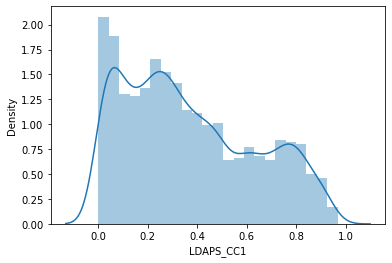

In [62]:
sns.distplot(df1['LDAPS_CC1'])

Observations:
    
    1.The data is been spread.

<AxesSubplot:xlabel='LDAPS_CC1'>

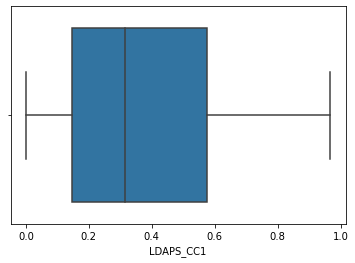

In [63]:
sns.boxplot(df1['LDAPS_CC1'])

Observations:
    
    1.There are significantly less null values.

In [64]:
df1['LDAPS_CC1'].isnull().sum()

75

In [65]:
df1['LDAPS_CC1'].fillna(df1['LDAPS_CC1'].median(),inplace=True)

**Column 12: LDAPS_CC2**

Introduction:
    
     LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97

<AxesSubplot:xlabel='LDAPS_CC2', ylabel='Density'>

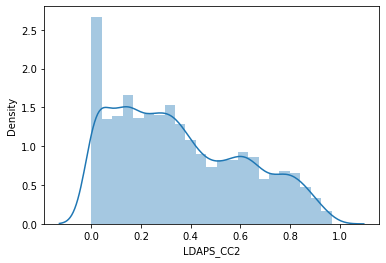

In [66]:
sns.distplot(df1['LDAPS_CC2'])

<AxesSubplot:xlabel='LDAPS_CC2'>

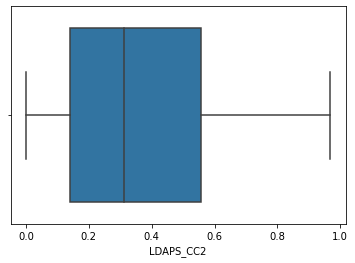

In [68]:
sns.boxplot(df1['LDAPS_CC2'])

Observations:
    
    1.There are significantly less outliers.

In [69]:
df1['LDAPS_CC2'].isnull().sum()

75

In [70]:
df1['LDAPS_CC2'].fillna(df1['LDAPS_CC2'].median(),inplace=True)

In [71]:
df1['LDAPS_CC2'].isnull().sum()

0

**Column 15:LDAPS_PPT1**

Introduction:
    
    LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7

In [72]:
df1['LDAPS_PPT1'].describe()

count    7675.000000
mean        0.589061
std         1.928044
min         0.000000
25%         0.000000
50%         0.000000
75%         0.052499
max        23.701544
Name: LDAPS_PPT1, dtype: float64

<AxesSubplot:xlabel='LDAPS_PPT1', ylabel='Density'>

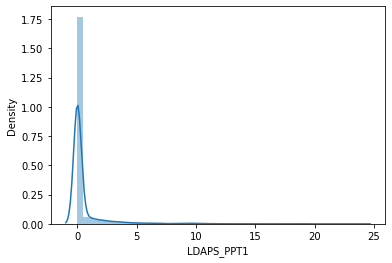

In [73]:
sns.distplot(df1['LDAPS_PPT1'])

Observations:
    
    1.Most of the observations are falls to 0 .

<AxesSubplot:xlabel='LDAPS_PPT1'>

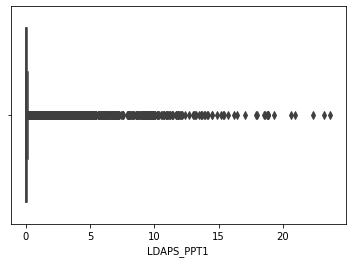

In [74]:
sns.boxplot(df1['LDAPS_PPT1'])

Observations:
    
    1.There are outliers.

In [75]:
df1['LDAPS_PPT1'].isnull().sum()

75

In [76]:
df1['LDAPS_PPT1'].fillna(df1['LDAPS_PPT1'].median(),inplace=True)

In [77]:
df1['LDAPS_PPT1'].isnull().sum()

0

**Column 16:lat**

Introduction:
    
     Latitude (Â°): 37.456 to 37.645

<AxesSubplot:xlabel='lat', ylabel='Density'>

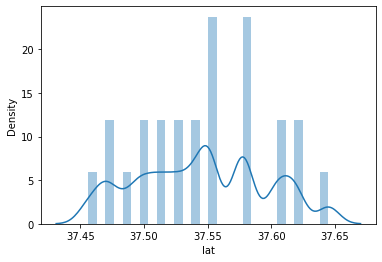

In [78]:
sns.distplot(df1['lat'])

Observations:
    
    1.These are the lattitude values of that region.

In [79]:
df1['lat'].isnull().sum()

0

**Column 17:lon**

Introduction:
    
    126.826 to 127.135

In [80]:
import folium
world_map=folium.Map(
location=[df1['lat'].mean(),df1['lon'].mean()],
zoom_start=13,tiles="Stamen Terrain")
world_map

Observations:
    
    1.This the area according to lattitude and longitude.

**Column 18:DEM**

Introduction:
    
    Elevation (m): 12.4 to 212.3

<AxesSubplot:xlabel='DEM', ylabel='Density'>

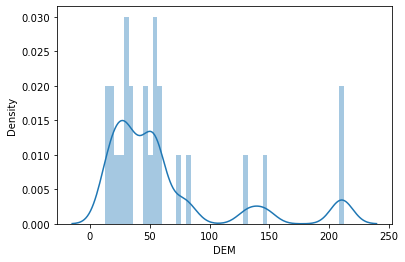

In [82]:
sns.distplot(df1['DEM'])

In [84]:
df1['DEM'].isnull().sum()

0

**Column 19:Slope**

Introduction:
    
    Slope (Â°): 0.1 to 5.2

<AxesSubplot:xlabel='Slope', ylabel='Density'>

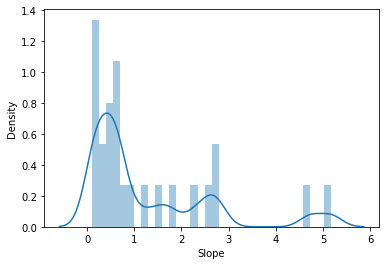

In [85]:
sns.distplot(df1['Slope'])

Observaions:
    
    1.It ranges from o to 5.

In [86]:
df1['Slope'].isnull().sum()

0

**Column 20:Solar radiation**

Introduction:
    
    Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9

<AxesSubplot:xlabel='Solar radiation', ylabel='Density'>

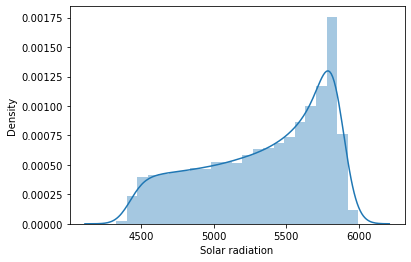

In [87]:
sns.distplot(df1['Solar radiation'])

Observations:
    
    1.The values ranges from 4000 to 6000.

<AxesSubplot:xlabel='Solar radiation'>

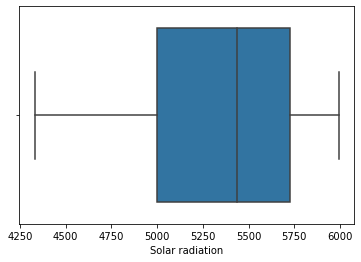

In [88]:
sns.boxplot(df1['Solar radiation'])

Observations:
    
    1.There are no outliers.

In [89]:
df1['Solar radiation'].isnull().sum()

0

**Column 21:Next_Tmax**

Introduction:
    
    The next-day maximum air temperature (Â°C): 17.4 to 38.9

<AxesSubplot:xlabel='Next_Tmax', ylabel='Density'>

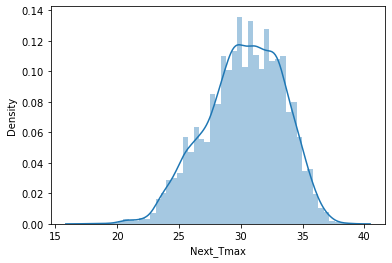

In [90]:
sns.distplot(df1['Next_Tmax'])

Observations:
    
    1.The temperature ranges from the 20 to 37.

In [91]:
df1['Next_Tmax'].isnull().sum()

27

In [92]:
df1['Next_Tmax'].fillna(df1['Next_Tmax'].median(),inplace=True)

In [93]:
df1['Next_Tmax'].isnull().sum()

0

**Column 22:Next_Tmin**

Introduction:
    
    The next-day minimum air temperature (Â°C): 11.3 to 29.8T

In [94]:
df1['Next_Tmin'].isnull().sum()

27

In [95]:
df1['Next_Tmin'].fillna(df1['Next_Tmin'].median(),inplace=True)

In [96]:
df1['Next_Tmin'].isnull().sum()

0

**Column 23:year**

In [97]:
df1['year'].isnull().sum()

0

# Multivariate analysis

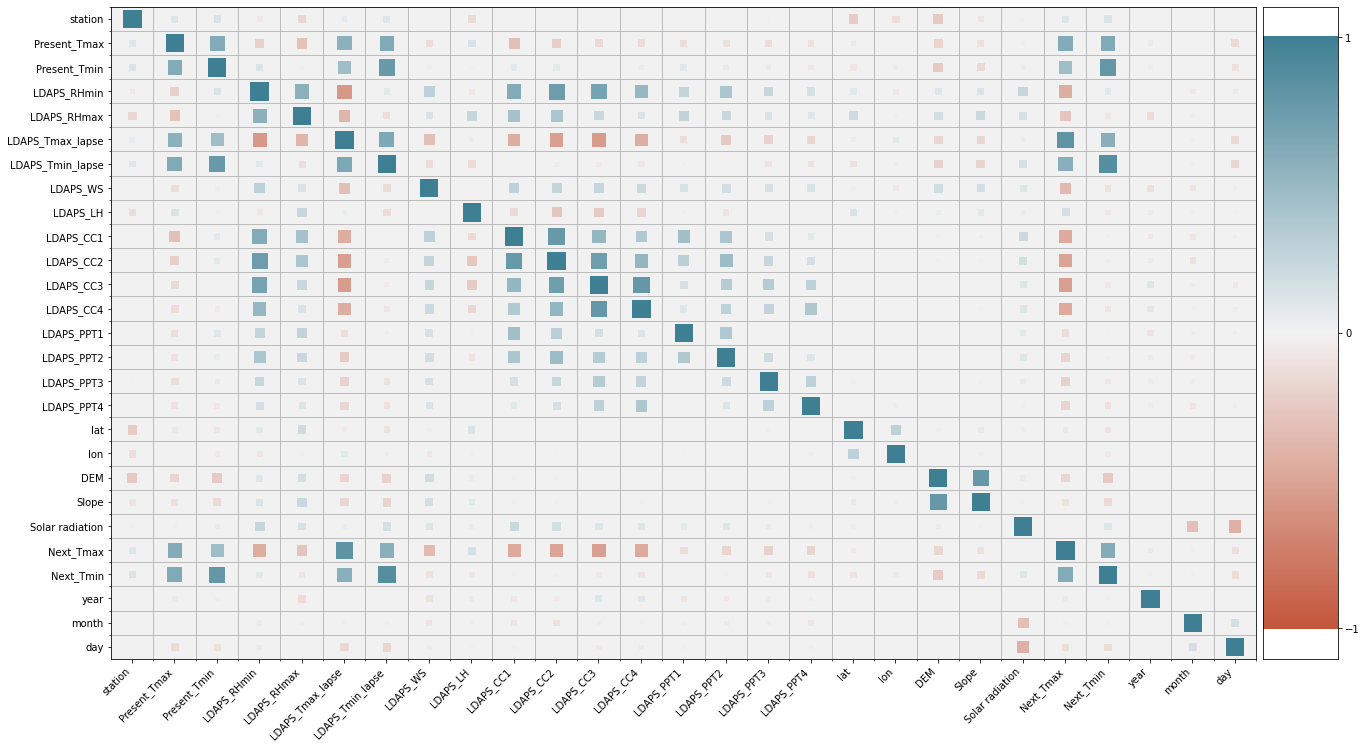

In [99]:
from heatmap import heatmap,corrplot
plt.figure(figsize=(22,12))
corrplot(df1.corr(),size_scale=300)
plt.show()

Observations:
    
    1.There might be chances for multicollinearity.

In [100]:
#Checking for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def CalculateVIF(Data):
 # Calculating VIF
 vif = dict()
 vif["FeatureColumns"] = Data.columns
 vif["VIF"] = [variance_inflation_factor(Data.values, i) for i in range(Data.shape[1])]
 return(pd.DataFrame(vif))

In [102]:
df1.isnull().sum()

station              0
Present_Tmax         0
Present_Tmin         0
LDAPS_RHmin          0
LDAPS_RHmax          0
LDAPS_Tmax_lapse     0
LDAPS_Tmin_lapse     0
LDAPS_WS             0
LDAPS_LH             0
LDAPS_CC1            0
LDAPS_CC2            0
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1           0
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax            0
Next_Tmin            0
year                 0
month                0
day                  0
dtype: int64

In [103]:
df1['LDAPS_CC3'].fillna(df1['LDAPS_CC3'].median(),inplace=True)
df1['LDAPS_CC4'].fillna(df1['LDAPS_CC4'].median(),inplace=True)
df1['LDAPS_PPT2'].fillna(df1['LDAPS_PPT2'].median(),inplace=True)
df1['LDAPS_PPT3'].fillna(df1['LDAPS_PPT3'].median(),inplace=True)
df1['LDAPS_PPT4'].fillna(df1['LDAPS_PPT4'].median(),inplace=True)

In [104]:
CalculateVIF(df1)

,FeatureColumns,VIF
0,station,5.194710e+00
1,Present_Tmax,2.965822e+02
2,Present_Tmin,3.303751e+02
3,LDAPS_RHmin,1.009665e+02
4,LDAPS_RHmax,3.504680e+02
5,LDAPS_Tmax_lapse,9.037965e+02
6,LDAPS_Tmin_lapse,9.475228e+02
7,LDAPS_WS,1.570067e+01
8,LDAPS_LH,6.894947e+00
9,LDAPS_CC1,1.061434e+01


Observations:
    
    1.Lattitude and longitudes are not correlated in an significant way with any variable and it has got high VIF value so we can remove this.
    2.Year column also exhibits same features.

In [105]:
df2=df1.drop(['lat','lon','year'],axis=1)

In [106]:
CalculateVIF(df2)

,FeatureColumns,VIF
0,station,4.940980
1,Present_Tmax,273.257036
2,Present_Tmin,326.949128
3,LDAPS_RHmin,99.083562
4,LDAPS_RHmax,237.485475
5,LDAPS_Tmax_lapse,814.279367
6,LDAPS_Tmin_lapse,929.952785
7,LDAPS_WS,14.796570
8,LDAPS_LH,6.712970
9,LDAPS_CC1,10.586407


In [107]:
#lets create one more simplified model
df3=df2.drop(['Solar radiation','Present_Tmin','LDAPS_RHmax','LDAPS_Tmin_lapse','LDAPS_CC2'],axis=1)

In [108]:
CalculateVIF(df3)

,FeatureColumns,VIF
0,station,4.899174
1,Present_Tmax,225.219415
2,LDAPS_RHmin,47.776558
3,LDAPS_Tmax_lapse,405.898824
4,LDAPS_WS,13.861667
5,LDAPS_LH,5.696484
6,LDAPS_CC1,6.696643
7,LDAPS_CC3,12.536545
8,LDAPS_CC4,7.083946
9,LDAPS_PPT1,1.496960


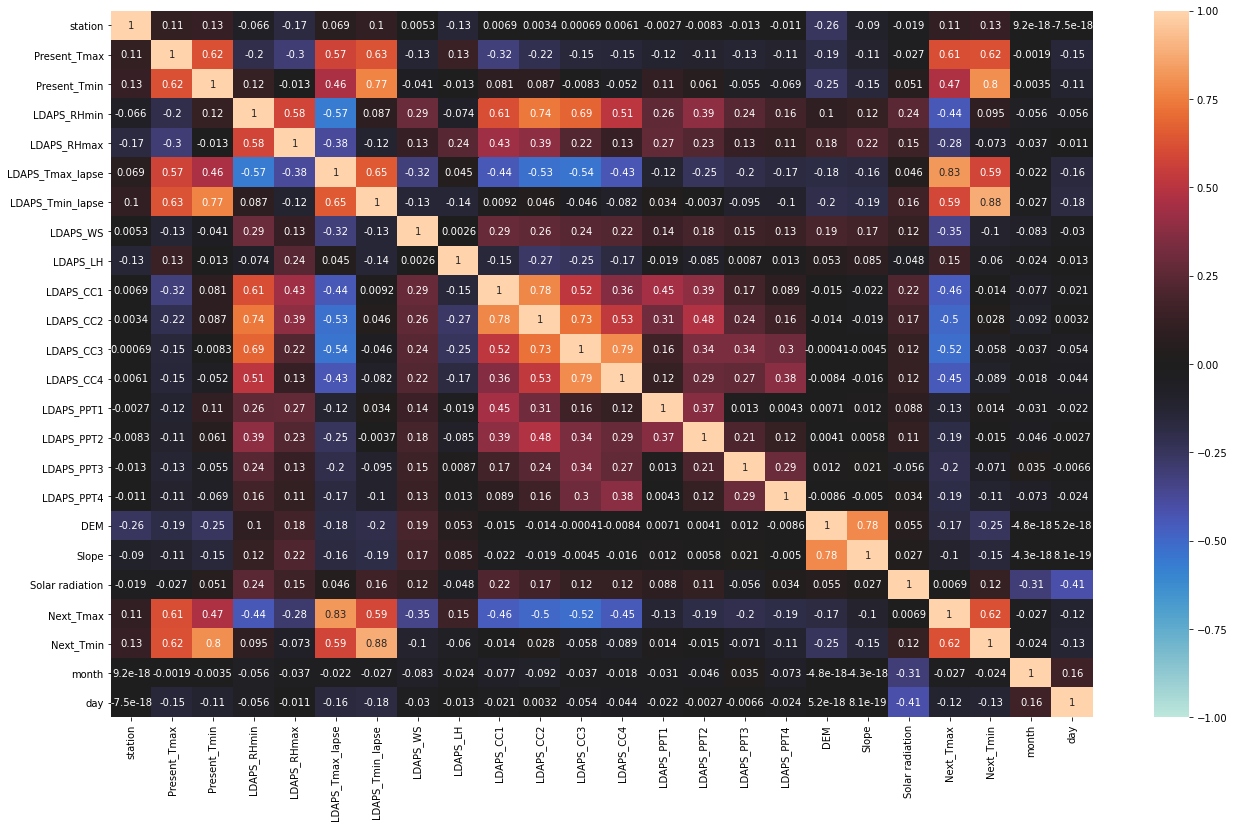

In [109]:
plt.figure(figsize=(22,13))
sns.heatmap(df2.corr(), annot = True, vmin=-1, vmax=1, center= 0)
plt.show()

Observations:
    
    There are independent variables which are significantly correlated with response variable.
       Response variable Next_Tmax
        1.Present_Tmax
        2.Present_Tmin
        3.LDAPS_RHmin
        4.LDAPS_RHmax
        5.LDAPS_Tmax_lapse
        6.LDAPS_Tmin_lapse
        7.LDAPS_WS
        8.LDAPS_CC1
        9.LDAPS_CC2
       Response variable Next_Tmin
        1.Present_Tmax
        2.Present_Tmin
        3.LDAPS_Tmax_lapse
        4.LDAPS_Tmin_lapse
        5.Next_Tmax    

# Bi variate analysis

# Analysing Response variable Next_Tmax

<AxesSubplot:xlabel='Present_Tmax', ylabel='Next_Tmax'>

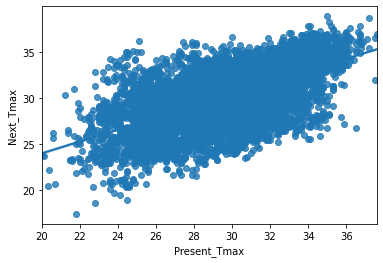

In [110]:
sns.regplot(x='Present_Tmax',y='Next_Tmax',data=df2)

Observations:
    
    1.Present tmax and next tmax varies linearly.

<AxesSubplot:xlabel='Present_Tmin', ylabel='Next_Tmax'>

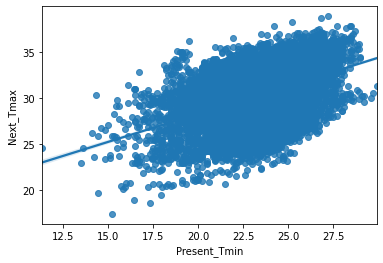

In [112]:
sns.regplot(x='Present_Tmin',y='Next_Tmax',data=df2)

Observations:
    
    1.It varies linearly.

<AxesSubplot:xlabel='LDAPS_RHmin', ylabel='Next_Tmax'>

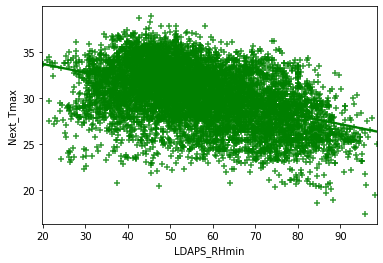

In [116]:
sns.regplot(x='LDAPS_RHmin',y='Next_Tmax',data=df2,color='g',marker='+')

Observations:
    
    1.The LDAPS_RHmin varies inversely with Next_Tmax

<AxesSubplot:xlabel='LDAPS_RHmax', ylabel='Next_Tmax'>

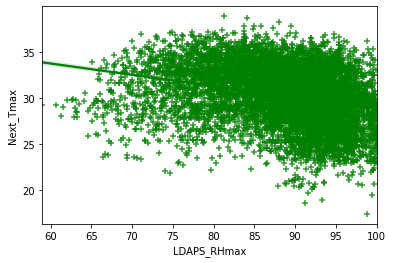

In [117]:
sns.regplot(x='LDAPS_RHmax',y='Next_Tmax',data=df2,color='g',marker='+')

Observations:
    
    The LDAPS_RHmax varies inversely with Next_Tmax

<AxesSubplot:xlabel='LDAPS_Tmax_lapse', ylabel='Next_Tmax'>

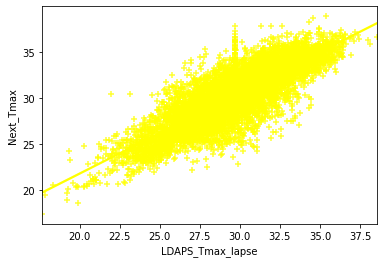

In [118]:
sns.regplot(x='LDAPS_Tmax_lapse',y='Next_Tmax',data=df2,color='yellow',marker='+')

Observations:
    
    1.The LDAPS_Tmax_lapse and Next_Tmax varies linearly.

<AxesSubplot:xlabel='LDAPS_Tmin_lapse', ylabel='Next_Tmax'>

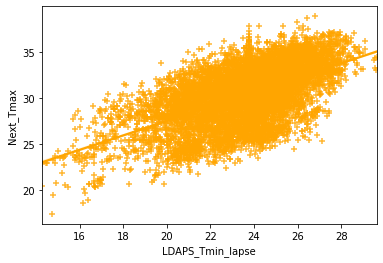

In [120]:
sns.regplot(x='LDAPS_Tmin_lapse',y='Next_Tmax',data=df2,color='orange',marker='+')

Observations:
    
    1.The LDAPS_Tmin_lapse varies linearly with Next_Tmax

<AxesSubplot:xlabel='LDAPS_WS', ylabel='Next_Tmax'>

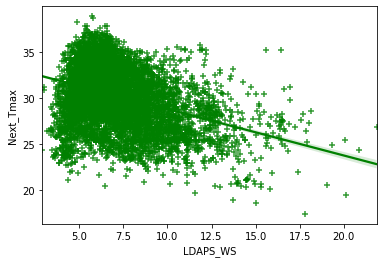

In [121]:
sns.regplot(x='LDAPS_WS',y='Next_Tmax',data=df2,color='g',marker='+')

Observations:
    
    1.The LDAPS_WS varies inversly with the Next_Tmax

<AxesSubplot:xlabel='LDAPS_CC1', ylabel='Next_Tmax'>

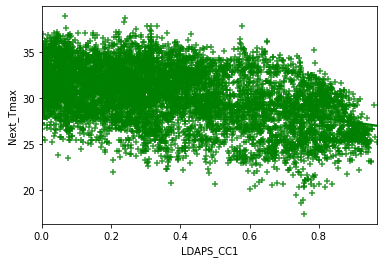

In [122]:
sns.regplot(x='LDAPS_CC1',y='Next_Tmax',data=df2,color='g',marker='+')

Observations:
    
    1.The LDAPS_CC1 and Next_Tmax varies almost like constant but it varies inversely.

# Analysing the response variable Next_Tmin

<AxesSubplot:xlabel='Present_Tmax', ylabel='Next_Tmin'>

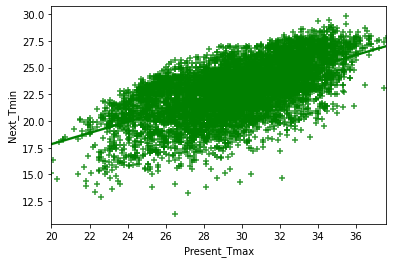

In [123]:
sns.regplot(x='Present_Tmax',y='Next_Tmin',data=df2,color='g',marker='+')

Observations:
    
    1.Present maximum temperature varies linearly with Next_Tmin

<AxesSubplot:xlabel='Present_Tmin', ylabel='Next_Tmin'>

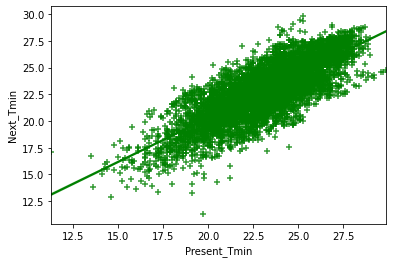

In [124]:
sns.regplot(x='Present_Tmin',y='Next_Tmin',data=df2,color='g',marker='+')

Observations:
    
    1.We can observe that Next_Tmin varies linearly with Present_Tmin.

<AxesSubplot:xlabel='LDAPS_Tmax_lapse', ylabel='Next_Tmin'>

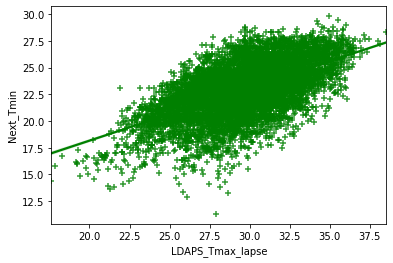

In [125]:
sns.regplot(x='LDAPS_Tmax_lapse',y='Next_Tmin',data=df2,color='g',marker='+')

Observations:
    
    1.The Next_Tmin varies linearly with LDAPS_Tmax_lapse.

<AxesSubplot:xlabel='Next_Tmax', ylabel='Next_Tmin'>

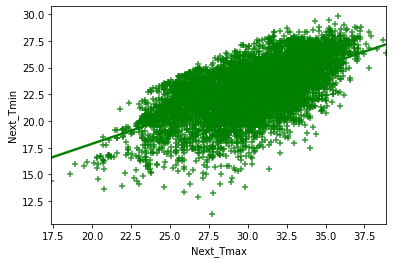

In [126]:
sns.regplot(x='Next_Tmax',y='Next_Tmin',data=df2,color='g',marker='+')

Observations:
    
    1.The Next_Tmin varies linearly with Next_Tmax.

# Data cleaning

In [127]:
df2.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
month               0
day                 0
dtype: int64

In [128]:
k=df2.applymap(np.isreal)
for col in k:
    print(col)
    print(k[col].value_counts())
    print('\n')

station
True    7750
Name: station, dtype: int64


Present_Tmax
True    7750
Name: Present_Tmax, dtype: int64


Present_Tmin
True    7750
Name: Present_Tmin, dtype: int64


LDAPS_RHmin
True    7750
Name: LDAPS_RHmin, dtype: int64


LDAPS_RHmax
True    7750
Name: LDAPS_RHmax, dtype: int64


LDAPS_Tmax_lapse
True    7750
Name: LDAPS_Tmax_lapse, dtype: int64


LDAPS_Tmin_lapse
True    7750
Name: LDAPS_Tmin_lapse, dtype: int64


LDAPS_WS
True    7750
Name: LDAPS_WS, dtype: int64


LDAPS_LH
True    7750
Name: LDAPS_LH, dtype: int64


LDAPS_CC1
True    7750
Name: LDAPS_CC1, dtype: int64


LDAPS_CC2
True    7750
Name: LDAPS_CC2, dtype: int64


LDAPS_CC3
True    7750
Name: LDAPS_CC3, dtype: int64


LDAPS_CC4
True    7750
Name: LDAPS_CC4, dtype: int64


LDAPS_PPT1
True    7750
Name: LDAPS_PPT1, dtype: int64


LDAPS_PPT2
True    7750
Name: LDAPS_PPT2, dtype: int64


LDAPS_PPT3
True    7750
Name: LDAPS_PPT3, dtype: int64


LDAPS_PPT4
True    7750
Name: LDAPS_PPT4, dtype: int64


DEM
True    7750


# Removal of outliers.

# zscore method

In [129]:
from scipy.stats import zscore
z=np.abs(zscore(df2))
threshold=3
df2_1=df2[(z<3).all(axis=1)]
print('percentage of loss of data by zscore is :',(df2.shape[0]-df2_1.shape[0])/df2.shape[0])

percentage of loss of data by zscore is : 0.11096774193548387


Observations:
    
    1.The data loss is more than 7% so we cant go for this process.

# IQR Method

In [137]:
q1=df2.quantile(0.25)
q3=df2.quantile(0.95)
IQR=q3-q1
df21=df2[~((df2 <(q1-1.5*IQR))|(df2 >(q3+1.5*IQR))).any(axis=1)]
print('percentage of loss of data by IQR is :',(df2.shape[0]-df21.shape[0])/df2.shape[0])

percentage of loss of data by IQR is : 0.06890322580645161


Observations:
    
    1.The data loss is huge,

In [138]:
#applying the same technique for alternstive model
q1=df3.quantile(0.25)
q3=df3.quantile(0.95)
IQR=q3-q1
df31=df2[~((df2 <(q1-1.5*IQR))|(df2 >(q3+1.5*IQR))).any(axis=1)]
print('percentage of loss of data by IQR is :',(df2.shape[0]-df31.shape[0])/df2.shape[0])

percentage of loss of data by IQR is : 0.06619354838709678


In [140]:
z=np.abs(zscore(df3))
threshold=3
df31=df3[(z<3).all(axis=1)]
print('percentage of loss of data by zscore is :',(df3.shape[0]-df31.shape[0])/df3.shape[0])

percentage of loss of data by zscore is : 0.09935483870967741


# Splitting the variable

In [141]:
#model 1
x11=df21.drop('Next_Tmax',axis=1)
y11=df21['Next_Tmax']

#model 2
x21=df31.drop('Next_Tmax',axis=1)
y21=df31['Next_Tmax']

In [142]:
#Lets check which is the best set of inputs out of two.
x_train,x_test,y_train,y_test=train_test_split(x11,y11,test_size=0.3,random_state=45)
ln=LinearRegression()
ln.fit(x_train,y_train)
predln=ln.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predln)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predln)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predln)),3))

r2 score is : 0.776
RMSE: 1.426
mean absolute error: 1.081


In [143]:
#Checking for x21,y21 model
x_train,x_test,y_train,y_test=train_test_split(x21,y21,test_size=0.3,random_state=45)
ln.fit(x_train,y_train)
predln=ln.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predln)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predln)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predln)),3))

r2 score is : 0.755
RMSE: 1.436
mean absolute error: 1.116


Observations:
    
    1.From the above observations we can say that x11,y11 is the best model.

# Removal of the skewness

In [144]:
x11.skew()

station             0.003292
Present_Tmax       -0.308961
Present_Tmin       -0.334083
LDAPS_RHmin         0.320419
LDAPS_RHmax        -0.757111
LDAPS_Tmax_lapse   -0.156784
LDAPS_Tmin_lapse   -0.553573
LDAPS_WS            1.510814
LDAPS_LH            0.659640
LDAPS_CC1           0.550144
LDAPS_CC2           0.498167
LDAPS_CC3           0.693082
LDAPS_CC4           0.713975
LDAPS_PPT1          4.043873
LDAPS_PPT2          4.778559
LDAPS_PPT3          5.218641
LDAPS_PPT4          5.655231
DEM                 1.726837
Slope               1.569548
Solar radiation    -0.526828
Next_Tmin          -0.369385
month              -0.685523
day                 0.238395
dtype: float64

Observations:
    
    1.We have to reduce the skewness of LDAPS_RHmax,LDAPS_WS,LDAPS_LH,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4 ,DEM,Slope

In [145]:
x=x11.copy()
y=y11.copy()

In [146]:
#lets find the best method for skewness
from scipy import stats
from scipy.stats import skew
def skee(a):
    model=[np.sqrt(a),np.cbrt(a),np.log(a),stats.boxcox(a)[0]]
    print('original skewness is:',a.skew())
    print('\n')
    for m in model:
        x=m
        print(skew(m))
        print('\n')

In [148]:
skee(x['LDAPS_RHmax'])

original skewness is: -0.75711133223052


-0.8556594452682513


-0.8894705364662426


-0.9585218364905251


-0.11200216196309644




In [253]:
from scipy.stats import boxcox
x['LDAPS_RHmax']=stats.boxcox(x['LDAPS_RHmax'])[0]

In [150]:
skee(x['LDAPS_WS'])

original skewness is: 1.5108144272126929


1.0214442606779999


0.8690655786125043


0.5756504524292495


-0.00314570797426663




In [254]:
x['LDAPS_WS']=stats.boxcox(x['LDAPS_WS'])[0]

In [255]:
x['LDAPS_LH']=np.cbrt(x['LDAPS_LH'])

In [256]:
x['LDAPS_CC3']=np.sqrt(x['LDAPS_CC3'])

In [257]:
x['LDAPS_CC4']=np.sqrt(x['LDAPS_CC4'])

In [265]:
x['LDAPS_PPT1']=np.cbrt(x['LDAPS_PPT1'])

In [266]:
x['LDAPS_PPT2']=np.cbrt(x['LDAPS_PPT2'])

In [267]:
x['LDAPS_PPT3']=np.cbrt(x['LDAPS_PPT3'])

In [268]:
x['LDAPS_PPT4']=np.cbrt(x['LDAPS_PPT4'])

In [262]:
x['DEM']=np.cbrt(x['DEM'])

In [263]:
x['Slope']=np.cbrt(x['Slope'])

In [214]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=45)
ln.fit(x_train,y_train)
predln=ln.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predln)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predln)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predln)),3))

r2 score is : 0.772
RMSE: 1.439
mean absolute error: 1.089


Observations:
    
    1.There is an significant increase in r2_score after removal of skewness.

# Building the model for Next_Tmax

In [215]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=45)

In [216]:
maxAccu=0
ln=LinearRegression()
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    mod=ln
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('the best accuracy is ',maxAccu,'on random state',maxRS)

the best accuracy is  0.7902180567093651 on random state 11


In [218]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=11)

In [219]:
print('x train shape:',x_train.shape)
print('x test shape',x_test.shape)
print('\n')
print('y train shape:',y_train.shape)
print('y test shape',y_test.shape)

x train shape: (5051, 23)
x test shape (2165, 23)


y train shape: (5051,)
y test shape (2165,)


In [220]:
#linear model
ln=LinearRegression()
ln.fit(x_train,y_train)
predln=ln.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predln)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predln)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predln)),3))

r2 score is : 0.79
RMSE: 1.401
mean absolute error: 1.072


In [225]:
#lasso model
ls=Lasso(alpha=0.001)
ls.fit(x_train,y_train)
predls=ls.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predls)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predls)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predls)),3))

r2 score is : 0.79
RMSE: 1.401
mean absolute error: 1.072


In [226]:
#Ridge model
rd=Ridge(alpha=0.01)
rd.fit(x_train,y_train)
predrd=rd.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predrd)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predrd)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predrd)),3))

r2 score is : 0.79
RMSE: 1.401
mean absolute error: 1.072


In [231]:
#ElasticNet model
enr=ElasticNet(alpha=0.001)
enr.fit(x_train,y_train)
predenr=enr.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predenr)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predenr)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predenr)),3))

r2 score is : 0.79
RMSE: 1.402
mean absolute error: 1.073


In [232]:
ran = RANSACRegressor(base_estimator=LinearRegression(), max_trials=100)
ran.fit(x_train, y_train)
predran=ran.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predran)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predran)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predran)),3))

r2 score is : 0.695
RMSE: 1.689
mean absolute error: 1.293


In [234]:
rf = RandomForestRegressor(n_estimators=1000)
rf.fit(x_train, y_train)
predrf=rf.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predrf)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predrf)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predrf)),3))

r2 score is : 0.903
RMSE: 0.955
mean absolute error: 0.707


In [235]:
from sklearn.svm import SVR
svr=SVR()

In [236]:
svr.fit(x_train, y_train)
predsvr=svr.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predsvr)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predsvr)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predsvr)),3))

r2 score is : 0.099
RMSE: 2.903
mean absolute error: 2.331


In [237]:
models=[ln,ls,rd,enr,ran,rf,svr]
for m in models:
    
    score=cross_val_score(m,x,y,cv=5)
    print(m,'score is:')
    print(round((score.mean()),3))
    print('\n')

LinearRegression() score is:
0.703


Lasso(alpha=0.001) score is:
0.703


Ridge(alpha=0.01) score is:
0.703


ElasticNet(alpha=0.001) score is:
0.704


RANSACRegressor(base_estimator=LinearRegression()) score is:
0.582


RandomForestRegressor(n_estimators=1000) score is:
0.688


SVR() score is:
-0.012




Observations:
    
    The difference between r2 score and cross val value of models are as below:
        1.LinearRegression:0.087
        2.Lasso           :0.087
        3.Ridge           :0.087
        4.ElasticNet      :0.086
        5.RANSACRegressor :0.113
        6.RF              :0.215
        7.svr             :0.111
          
         The best model is Linear regression because it has least difference.


# Hyper parameter tuning

Linear regression dont have any significant parameters for hyper parameter tuning

In [243]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
xs=scale.fit_transform(x)

In [244]:
x_train,x_test,y_train,y_test=train_test_split(xs,y,test_size=0.3,random_state=11)

In [245]:
ln=LinearRegression()
ln.fit(x_train,y_train)
predln=ln.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predln)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predln)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predln)),3))

r2 score is : 0.79
RMSE: 1.401
mean absolute error: 1.072


Observations:
    
    1.The highest r2 score with least error we got is 0.79

# Saving the model

In [242]:
import joblib
joblib.dump(ln,'tmax.obj')

['tmax.obj']

# Building the model for Next_Tmin

In [249]:
df2.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,month,day
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,212.3350,2.7850,5992.895996,29.1,21.2,6,30
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,44.7624,0.5141,5869.312500,30.5,22.5,6,30
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,33.3068,0.2661,5863.555664,31.1,23.9,6,30
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,45.7160,2.5348,5856.964844,31.7,24.3,6,30
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,35.0380,0.5055,5859.552246,31.2,22.5,6,30


In [250]:
df2.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'month', 'day'],
      dtype='object')

In [251]:
x=df2.drop('Next_Tmin',axis=1)
y=df2['Next_Tmin']

In [269]:
x.skew()

station             0.000000
Present_Tmax       -0.262431
Present_Tmin       -0.356627
LDAPS_RHmin         0.300396
LDAPS_RHmax        -0.120969
LDAPS_Tmax_lapse   -0.225096
LDAPS_Tmin_lapse   -0.582013
LDAPS_WS           -0.000986
LDAPS_LH           -0.347834
LDAPS_CC1           0.464742
LDAPS_CC2           0.476659
LDAPS_CC3          -0.112970
LDAPS_CC4          -0.025167
LDAPS_PPT1          0.881351
LDAPS_PPT2          1.072619
LDAPS_PPT3          1.158483
LDAPS_PPT4          1.484501
DEM                 0.920075
Slope               0.614133
Solar radiation    -0.511006
Next_Tmax          -0.336700
month              -0.705241
day                 0.245482
dtype: float64

In [270]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=11)

In [271]:
#linear model
ln=LinearRegression()
ln.fit(x_train,y_train)
predln=ln.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predln)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predln)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predln)),3))

r2 score is : 0.85
RMSE: 0.963
mean absolute error: 0.767


In [272]:
#lasso model
ls=Lasso(alpha=0.00001)
ls.fit(x_train,y_train)
predls=ls.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predls)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predls)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predls)),3))

r2 score is : 0.85
RMSE: 0.963
mean absolute error: 0.767


In [273]:
#Ridge model
rd=Ridge(alpha=0.01)
rd.fit(x_train,y_train)
predrd=rd.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predrd)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predrd)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predrd)),3))

r2 score is : 0.85
RMSE: 0.963
mean absolute error: 0.767


In [274]:
#ElasticNet model
enr=ElasticNet(alpha=0.00001)
enr.fit(x_train,y_train)
predenr=enr.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predenr)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predenr)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predenr)),3))

r2 score is : 0.85
RMSE: 0.963
mean absolute error: 0.767


In [275]:
ran = RANSACRegressor(base_estimator=LinearRegression(), max_trials=100)
ran.fit(x_train, y_train)
predran=ran.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predran)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predran)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predran)),3))

r2 score is : 0.728
RMSE: 1.298
mean absolute error: 1.005


In [276]:
rf = RandomForestRegressor(n_estimators=1000)
rf.fit(x_train, y_train)
predrf=rf.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predrf)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predrf)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predrf)),3))

r2 score is : 0.909
RMSE: 0.75
mean absolute error: 0.57


In [277]:
svr.fit(x_train, y_train)
predsvr=svr.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predsvr)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predsvr)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predsvr)),3))

r2 score is : 0.012
RMSE: 2.475
mean absolute error: 1.923


# Cross validation scores

In [278]:
models=[ln,ls,rd,enr,ran,rf,svr]
for m in models:
    
    score=cross_val_score(m,x,y,cv=5)
    print(m,'score is:')
    print(round((score.mean()),3))
    print('\n')

LinearRegression() score is:
0.792


Lasso(alpha=1e-05) score is:
0.792


Ridge(alpha=0.01) score is:
0.792


ElasticNet(alpha=1e-05) score is:
0.792


RANSACRegressor(base_estimator=LinearRegression()) score is:
0.649


RandomForestRegressor(n_estimators=1000) score is:
0.785


SVR() score is:
-0.206




Observations:
    
    The difference between r2 score and cross val value of models are as below:
        1.LinearRegression:0.058
        2.Lasso           :0.058
        3.Ridge           :0.058
        4.ElasticNet      :0.058
        5.RANSACRegressor :0.079
        6.RF              :0.124
        7.svr             :0.218
        
            
            So the best model is Linear regression

# Hyper parameter tuning

Linear regression dont have any significant parameters for hyper parameter tuning

In [279]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=11)

In [280]:
ln=LinearRegression()
ln.fit(x_train,y_train)
predln=ln.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predln)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predln)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predln)),3))

r2 score is : 0.85
RMSE: 0.963
mean absolute error: 0.767


Observations:
    
    1.The highest r2 score with least error is 0.85

# Saving the model

In [281]:
import joblib
joblib.dump(ln,'lnnexttmin.obj')

['lnnexttmin.obj']